In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

#### Debido a mi profesión dentro de la salud mental, me interesa analizar el fenómeno del suicidio. En base a nuevos datos provenientes del Estado, me dedicaré a reconocer cuestiones relativas al suicidio en el territorio nacional de los últimos años.
### El suicidio es una de las principales causas de muerte en jóvenes, junto a los accidentes de tránsito y asesinatos.
####En particular me interesa investigar sobre la distribución de los casos respecto a zonas geográficas, modalidades y edades predominantes.
####Analizaré el dataset originalmente llamado "SAT-SS-BU_2017-2021.xlsx" proveniente del Ministerio de Seguridad de la Nación. Este archivo contiene datos sobre los suicidios en territorio nacional dentro del período [2017:2021].
####Algunas preguntas para investigar:
####¿Cómo se distribuyen los casos en el país? ¿Cuáles son las provincias más afectadas? ¿Cúal es su tasa de suicidio?
####¿Como se componen mayoritariamente los casos (Modalidad, edad, género)?
####¿Hay modalidades más frecuentes por edad?



# Parte 1: Análisis descriptivo

In [3]:
#carga de datos:
# Ministerio de Seguridad de la Nación
# https://estadisticascriminales.minseg.gob.ar/datos/SAT-SS-BU_2017-2021.xlsx
df_suicidios = pd.read_excel("suicidios.xlsx")

#  Población proviene del Censo Nacional
# https://1drv.ms/x/s!AqyuNhGV9VH7gqgSOXKNrUjYPVBLAg?e=daQyBQ

df_poblacion = pd.read_excel("PoblacionXprov.xlsx")

In [ ]:
#Las filas de df_suicidios representan los casos de suicidio. Prestaremos especial atención a las columnas
#provincia, año, hora, lugar, modalidad, sexo y edad.
df_suicidios.info()

#Población contiene la cantidad de habitantes por provincia.
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17764 entries, 0 to 17763
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_hecho                     17764 non-null  int64         
 1   federal                      17764 non-null  object        
 2   Cod_INDEC_Prov               17764 non-null  int64         
 3   provincia                    17764 non-null  object        
 4   codigo_departamento          17764 non-null  int64         
 5   Cod_INDEC                    17764 non-null  int64         
 6   departamento                 17764 non-null  object        
 7   localidad                    17764 non-null  object        
 8   codigo_localidad             17764 non-null  object        
 9   anio                         17764 non-null  int64         
 10  mes                          17764 non-null  int64         
 11  fecha_hecho                  17764 non-nu

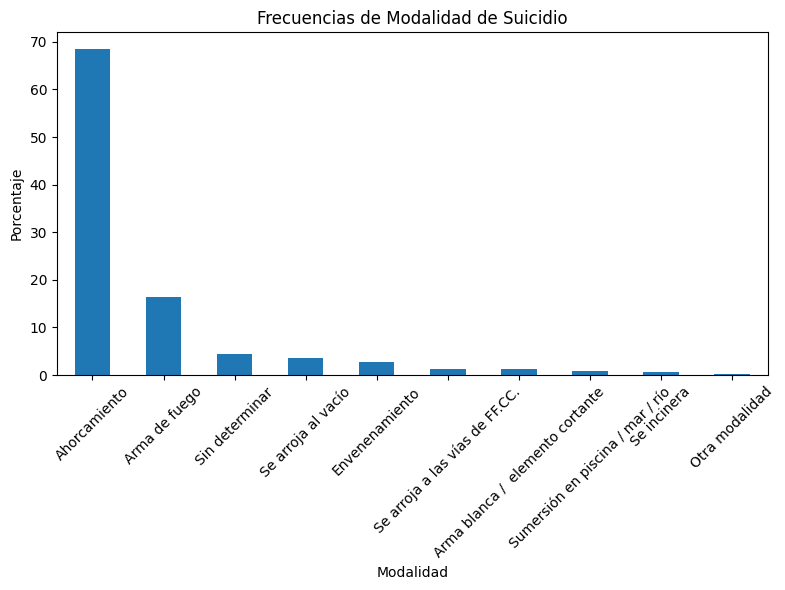

In [4]:
# Obtener las frecuencias de la columna "modalidad"
modalidad_counts = df_suicidios["modalidad"].value_counts()

# Calcular los porcentajes dividiendo por el total y multiplicando por 100
porcentajes = modalidad_counts / modalidad_counts.sum() * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
porcentajes.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_title("Frecuencias de Modalidad de Suicidio")
ax.set_xlabel("Modalidad")
ax.set_ylabel("Porcentaje")

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico

# Mostrar el gráfico
plt.show()

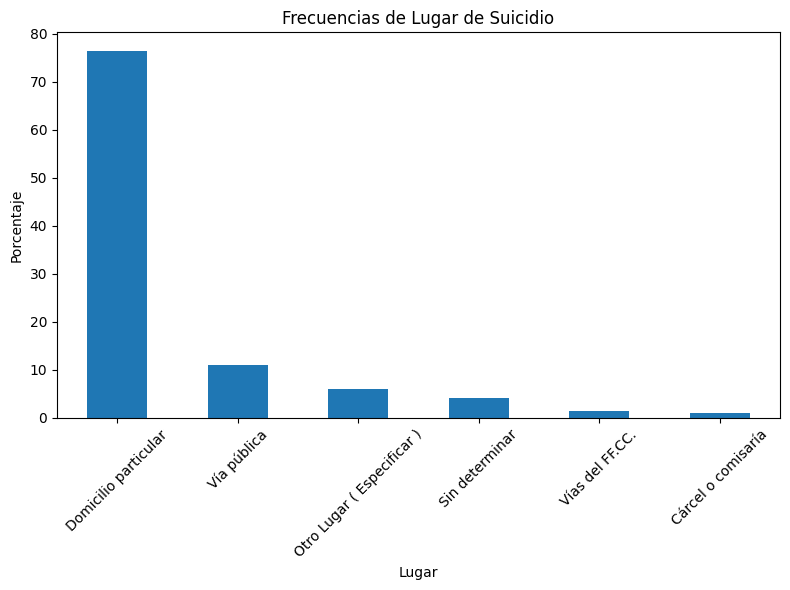

In [5]:
# Obtener las frecuencias de la columna "lugar"
modalidad_counts = df_suicidios["tipo_lugar"].value_counts()

# Calcular los porcentajes dividiendo por el total y multiplicando por 100
porcentajes = modalidad_counts / modalidad_counts.sum() * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
porcentajes.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_title("Frecuencias de Lugar de Suicidio")
ax.set_xlabel("Lugar")
ax.set_ylabel("Porcentaje")

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico

# Mostrar el gráfico
plt.show()

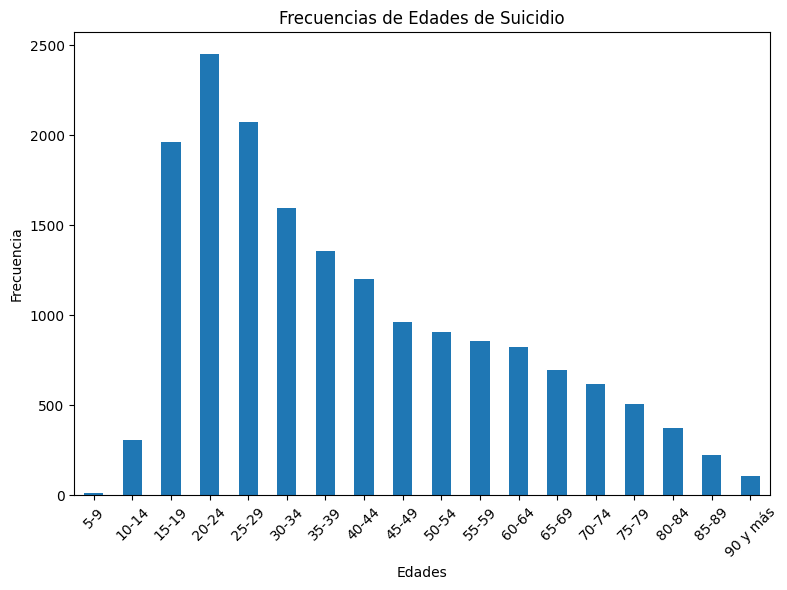

In [ ]:
# Obtener las frecuencias de la columna "tr_edad_suicida"
modalidad_counts = df_suicidios["tr_edad_suicida"].value_counts()

# Definir el orden deseado de las edades
edades_ordenadas = ["5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90 y más"]

# Reordenar las frecuencias según el orden de las edades
modalidad_counts = modalidad_counts.reindex(edades_ordenadas)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
modalidad_counts.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_title("Frecuencias de Edades de Suicidio")
ax.set_xlabel("Edades")
ax.set_ylabel("Frecuencia")

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico

# Mostrar el gráfico
plt.show()


In [ ]:
from tabulate import tabulate

# Obtener las frecuencias absolutas de la columna "tr_edad_suicida"
modalidad_counts = df_suicidios["tr_edad_suicida"].value_counts()

# Calcular el total de registros
total_registros = modalidad_counts.sum()

# Calcular las frecuencias relativas dividiendo por el total
frecuencias_relativas = modalidad_counts / total_registros

# Calcular las frecuencias relativas acumuladas
frecuencias_acumuladas = frecuencias_relativas.cumsum()

# Crear la tabla de frecuencias relativas
tabla_frecuencias_relativas = pd.DataFrame({"Edades": frecuencias_relativas.index, "Frecuencia Absoluta": modalidad_counts.values, "Frecuencia Relativa": frecuencias_relativas.values, "Frecuencia Relativa Acumulada": frecuencias_acumuladas.values})

# Ordenar la tabla por la frecuencia relativa acumulada de menor a mayor
tabla_frecuencias_relativas = tabla_frecuencias_relativas.sort_values(by="Frecuencia Relativa Acumulada")

# Mostrar la tabla de frecuencias relativas en forma de cuadro
print(tabulate(tabla_frecuencias_relativas, headers='keys', tablefmt='psql'))


+----+----------------+-----------------------+-----------------------+---------------------------------+
|    | Edades         |   Frecuencia Absoluta |   Frecuencia Relativa |   Frecuencia Relativa Acumulada |
|----+----------------+-----------------------+-----------------------+---------------------------------|
|  0 | 20-24          |                  2450 |           0.137919    |                        0.137919 |
|  1 | 25-29          |                  2075 |           0.116809    |                        0.254729 |
|  2 | 15-19          |                  1963 |           0.110504    |                        0.365233 |
|  3 | 30-34          |                  1596 |           0.0898446   |                        0.455078 |
|  4 | 35-39          |                  1360 |           0.0765593   |                        0.531637 |
|  5 | 40-44          |                  1204 |           0.0677775   |                        0.599415 |
|  6 | 45-49          |                   964 

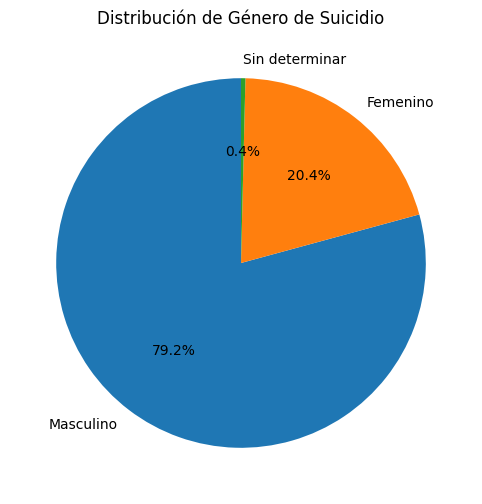

In [ ]:
# Obtener las frecuencias de la columna "sexo_suicida"
modalidad_counts = df_suicidios["sexo_suicida"].value_counts()

# Crear el gráfico de dona
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(modalidad_counts, labels=modalidad_counts.index, autopct='%1.1f%%', startangle=90)

# Personalizar el gráfico
ax.set_title("Distribución de Género de Suicidio")

# Mostrar el gráfico
plt.show()

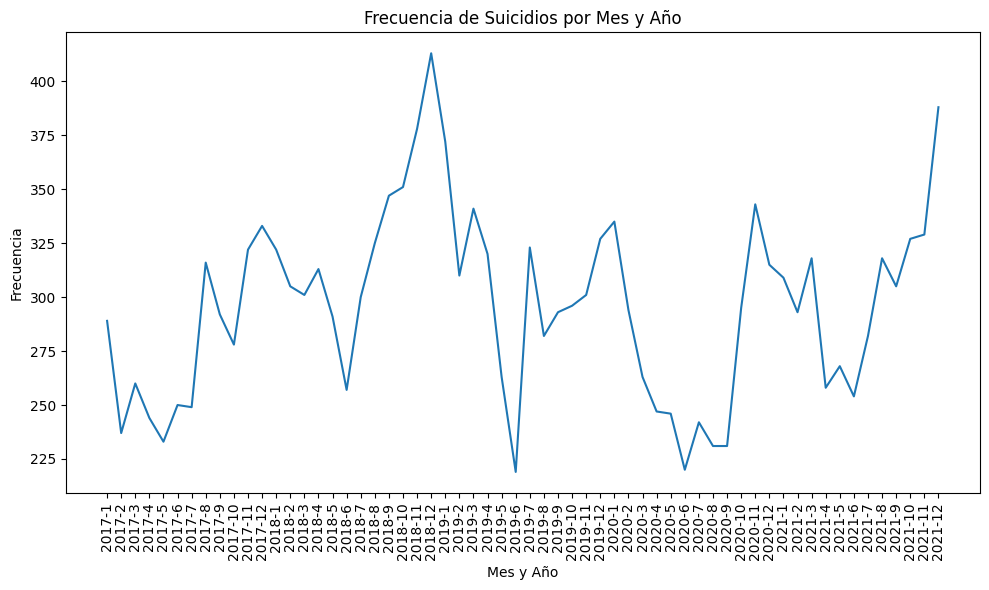

In [ ]:
# Obtener las frecuencias de ocurrencia por mes y año
modalidad_counts = df_suicidios.groupby(["anio", "mes"]).size()

# Crear el gráfico de línea
fig, ax = plt.subplots(figsize=(10, 6))
modalidad_counts.plot(kind='line', ax=ax)

# Personalizar el gráfico
ax.set_title("Frecuencia de Suicidios por Mes y Año")
ax.set_xlabel("Mes y Año")
ax.set_ylabel("Frecuencia")

# Obtener los ticks y etiquetas deseadas
ticks = range(len(modalidad_counts))
etiquetas = [f"{anio}-{mes}" for (anio, mes) in modalidad_counts.index]

# Establecer los ticks y etiquetas en el eje x
plt.xticks(ticks, etiquetas, rotation=90)

plt.tight_layout()  # Ajustar el diseño del gráfico

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar por provincia y año, y obtener el conteo de suicidios
promedio_anio_prov = df_suicidios['provincia'].value_counts()/len(df_suicidios['anio'].unique())

promedio_anio_prov.head(25)

BUENOS AIRES              1068.8
SANTA FE                   353.4
CORDOBA                    244.4
CIUDAD DE BUENOS AIRES     217.2
ENTRE RIOS                 211.8
MENDOZA                    196.0
SALTA                      178.6
TUCUMÁN                    125.4
SANTIAGO DEL ESTERO        116.8
CHACO                      101.0
MISIONES                    89.2
CORRIENTES                  71.4
NEUQUEN                     63.4
CHUBUT                      62.4
FORMOSA                     61.4
SAN JUAN                    59.6
SAN LUIS                    58.6
JUJUY                       52.0
RIO NEGRO                   48.2
CATAMARCA                   41.0
LA RIOJA                    40.8
SANTA CRUZ                  40.4
LA PAMPA                    36.6
TIERRA DEL FUEGO            14.4
Name: provincia, dtype: float64

In [ ]:
#Carga de datos georreferenciales provenientes del Instituto Geográfico Nacional
# https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcaci%C3%B3n/L%C3%ADmites/provincia/json

datos_provincias = gpd.read_file("provincia.json")

##Utilizaremos la cantidad de casos por provincia y los datos georreferenciados para mostrar la distriución de la cantidad de suicidios por la cantidad de habitantes de cada provincia.

In [ ]:
# Estandarizar las etiquetas de provincia en ambos DataFrames
datos_provincias['provincia_estandar'] = datos_provincias['nam'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_suicidios['provincia_estandar'] = df_suicidios['provincia'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_poblacion['provincia_estandar'] = df_poblacion['Jurisdicción'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Obtener los conteos de suicidios por provincia y poblacion
suicidios_tot = df_suicidios['provincia_estandar'].value_counts()

# Asignar los valores a la columna 'suicidios_tot' en datos_provincias
datos_provincias['suicidios_tot'] = datos_provincias['provincia_estandar'].map(suicidios_tot)
datos_provincias = datos_provincias.merge(df_poblacion[['provincia_estandar', 'Total de población']], on='provincia_estandar', how='left')

# Eliminar la columna 'provincia_estandar' si no se necesita
datos_provincias.drop('provincia_estandar', axis=1, inplace=True)
# datos_provincias.drop('Total de población_x', axis=1, inplace=True)

#insert directo debido a diferencias entre los mapeos con el nombre de provincia de los distintos dataset
datos_provincias.at[0, 'suicidios_tot'] = 1086
datos_provincias.at[6, 'suicidios_tot'] = 1059
datos_provincias.at[22, 'suicidios_tot'] = 307
datos_provincias.at[15, 'suicidios_tot'] = 72
datos_provincias.at[15, 'Total de población'] = 190641
datos_provincias.at[6, 'Total de población'] = 1426426
datos_provincias = datos_provincias.rename(columns={'Total de población_x': 'Total de población'})

#cada 100000 habitantes
datos_provincias['tasa'] = (datos_provincias['suicidios_tot'] / datos_provincias['Total de población'])*100000
datos_provincias['tasa'] = datos_provincias['tasa']/5


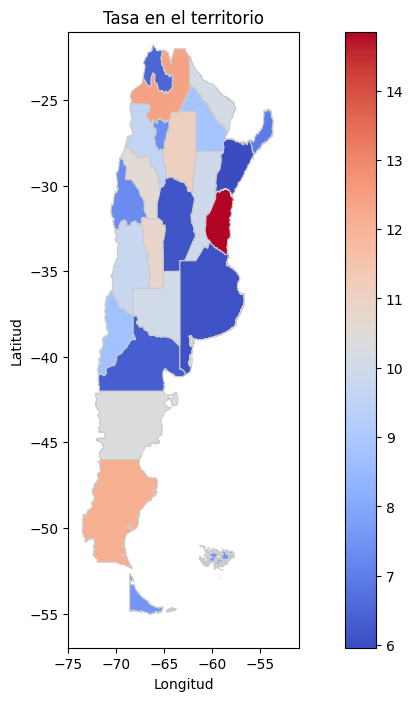

In [ ]:
# Visualizar el mapa con la columna "tasa"
fig, ax = plt.subplots(figsize=(12, 8))

# Colormap para la barra de color (leyenda)
cmap = 'coolwarm'
norm = plt.Normalize(vmin=datos_provincias['tasa'].min(), vmax=datos_provincias['tasa'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Crear el mapa
datos_provincias.plot(column='tasa', cmap=cmap, linewidth=0.8, edgecolor='0.8', ax=ax, legend=True)

plt.ylim([-57, -21])
plt.xlim([-75, -51])

plt.title('Tasa en el territorio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
datos_provincias[["nam", "tasa"]].sort_values(by="tasa")

,nam,tasa
11,Corrientes,5.962158
16,Buenos Aires,6.083424
14,Córdoba,6.142271
10,Río Negro,6.324903
8,Jujuy,6.516658
0,Ciudad Autónoma de Buenos Aires,6.960173
12,Misiones,6.963527
7,San Juan,7.283980
20,Tucumán,7.362672
15,"Tierra del Fuego, Antártida e Islas del Atlánt...",7.553464


In [ ]:
datos_provincias["tasa"].describe()

count    24.000000
mean      9.011945
std       2.348652
min       5.962158
25%       6.962689
50%       9.190710
75%      10.411708
max      14.848299
Name: tasa, dtype: float64

Como datos llamativos del set de datos, podemos observar que:


---


* En el lapso de 2017-1 hasta 2021-8 se registraron 17764 casos, distribuidos con un promedio de 3552 casos por año con un desvio de 268. Ocurrieron apenas menos de 10 casos en promedio por día, a nivel nacional. Cabe remarcar que 2021 se encuentra incompleto.
* La tasa nacional anual fue de 9 cada 100000 habitantes en el periodo 2017-2021.
* El comportamiento de la serie temporal es cíclico, concentrandose la mayor parte en los meses 1 y 12, disminuyendo fuertemente hacia el mes 6.
* La modalidad de suicidio más usual es el "ahorcamiento",
moda con valor 12178, representando un 69% del total, seguida por "arma de fuego" con un 17%.
* El lugar donde más ocurre es "domicilio particular", moda con valor 13587, representando el 76% del total, seguido por "via pública" con un 11%.
* La franja etaria más afectada es 20-24 años con un 14% de los casos, aunque también las franjas mas cercanas a ella son las que le siguen, por lo que podemos pensar a la franja 15-29 como la más afectada, acumulando un 37% de los casos y disminuyendo la frecuencia hacia los extremos etarios.
* En cuanto al sexo, los hombres son quienes más frecuencia acumulan, 14075 casos que representan casi un 80%, mientras las mujeres están ligeramente por encima del 20%. Es decir, de cada 5 suicidios, 4 son de sexo masculino y 1 femenino.
* Entre Ríos tuvo la mayor tasa de suicidios por habitante a nivel nacional con 14,85 casos cada 100000 seguido por Salta y Santa Cruz. La provincia con menor tasa fue Corrientes con 5,96.
* Casos por año:
*2017 -> 3303
*2018 -> 3903
*2019 ->   3647
*2020 ->   3262
*2021 ->   3649 (Hasta septiembre, se estima 10% a 20% superior)

#Parte 2: Análisis por regresión lineal:

### Se indaga sobre las posibles correlaciones que afectarían las probabilidades de cometer suicidio con las modalidades más usuales: "ahorcamiento" y "Arma de Fuego".
### Principalmente se indaga sobre posibles correlaciones de acuerdo a la Edad, Sexo y Horario(día o noche).

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
mlr_df_suicidio = pd.read_excel("suicidios.xlsx")

In [ ]:
mlr_df_suicidio.drop('id_hecho', axis=1, inplace=True)
mlr_df_suicidio.drop('federal', axis=1, inplace=True)
mlr_df_suicidio.drop('Cod_INDEC_Prov', axis=1, inplace=True)
mlr_df_suicidio.drop('codigo_departamento', axis=1, inplace=True)
mlr_df_suicidio.drop('Cod_INDEC', axis=1, inplace=True)
mlr_df_suicidio.drop('departamento', axis=1, inplace=True)
mlr_df_suicidio.drop('localidad', axis=1, inplace=True)
mlr_df_suicidio.drop('codigo_localidad', axis=1, inplace=True)
mlr_df_suicidio.drop('tipo_lugar_ampliado', axis=1, inplace=True)
mlr_df_suicidio.drop('otro_tipo_lugar', axis=1, inplace=True)
mlr_df_suicidio.drop('modalidad_ampliada', axis=1, inplace=True)
mlr_df_suicidio.drop('otro_modalidad', axis=1, inplace=True)
mlr_df_suicidio.drop('otro_motivo_origen_registro', axis=1, inplace=True)
mlr_df_suicidio.drop('tipo_persona_id', axis=1, inplace=True)
mlr_df_suicidio.drop('identidad_genero_suicida', axis=1, inplace=True)

mlr_df_suicidio = mlr_df_suicidio.drop(mlr_df_suicidio[(mlr_df_suicidio['tr_edad_suicida'] == 'Sin determinar') | (mlr_df_suicidio['tr_edad_suicida'] == '5-9')].index)

In [ ]:
# crear columnas %de arma de fuego (probabilidad de uso de arma de fuego para su edad)

mapeo_edad_arma_fuego = {
    "10-14": 10.32,
    "15-19": 8.30,
    "20-24": 9.59,
    "25-29": 11.28,
    "30-34": 12.03,
    "35-39": 14.63,
    "40-44": 15.53,
    "45-49": 16.39,
    "50-54": 18.04,
    "55-59": 18.60,
    "60-64": 25.54,
    "65-69": 26.91,
    "70-74": 36.45,
    "75-79": 38.82,
    "80-84": 40.43,
    "85-89": 39.29,
    "90 y más": 36.70,
}

mlr_df_suicidio['% de arma de fuego'] = mlr_df_suicidio['tr_edad_suicida'].map(mapeo_edad_arma_fuego)

#edades mapeadas a ordinal

mapeo_edad_ordinal = {
    "10-14": 1,
    "15-19": 2,
    "20-24": 3,
    "25-29": 4,
    "30-34": 5,
    "35-39": 6,
    "40-44": 7,
    "45-49": 8,
    "50-54": 9,
    "55-59": 10,
    "60-64": 11,
    "65-69": 12,
    "70-74": 13,
    "75-79": 14,
    "80-84": 15,
    "85-89": 16,
    "90 y más": 17,
}

mlr_df_suicidio['edad_ordinal'] = mlr_df_suicidio['tr_edad_suicida'].map(mapeo_edad_ordinal)

#sexo mapeado a binario

mapeo_sexo_binario = {
    "Masculino": 1,
    "Femenino": 0,
}

mlr_df_suicidio['sexo_binario'] = mlr_df_suicidio['sexo_suicida'].map(mapeo_sexo_binario)

In [ ]:
# Convert time column to datetime data type
mlr_df_suicidio['hora_hecho'] = pd.to_datetime(mlr_df_suicidio['hora_hecho'], format='%H:%M:%S')

# Define the mapping function
def map_time_category(time):
    if time >= pd.to_datetime('20:00:00', format='%H:%M:%S') or time < pd.to_datetime('00:00:00', format='%H:%M:%S'):
        return 'Noche'
    elif time >= pd.to_datetime('00:00:00', format='%H:%M:%S') and time < pd.to_datetime('04:00:00', format='%H:%M:%S'):
        return 'Madrugada'
    elif time >= pd.to_datetime('04:00:00', format='%H:%M:%S') and time < pd.to_datetime('08:00:00', format='%H:%M:%S'):
        return 'Mañana'
    elif time >= pd.to_datetime('08:00:00', format='%H:%M:%S') and time < pd.to_datetime('12:00:00', format='%H:%M:%S'):
        return 'Media_Mañana'
    elif time >= pd.to_datetime('12:00:00', format='%H:%M:%S') and time < pd.to_datetime('16:00:00', format='%H:%M:%S'):
        return 'Tarde'
    elif time >= pd.to_datetime('16:00:00', format='%H:%M:%S') and time < pd.to_datetime('20:00:00', format='%H:%M:%S'):
        return 'Media_Tarde'
    else:
        return 'Desconocido'

# Map the time column to categorical values
mlr_df_suicidio['hora_categorica'] = mlr_df_suicidio['hora_hecho'].apply(map_time_category)

# Map the time column to categorical values
mlr_df_suicidio['hora_categorica'] = mlr_df_suicidio['hora_hecho'].apply(map_time_category)

# Convert categorical column to one-hot encoding
hora_dummies = pd.get_dummies(mlr_df_suicidio['hora_categorica'], prefix='hora')

# Concatenate the one-hot encoded variables to the original dataframe
mlr_df_suicidio = pd.concat([mlr_df_suicidio, hora_dummies], axis=1)

In [ ]:
# Crear una lista para almacenar los datos
datos_proporcion = []

# Obtener todas las combinaciones posibles de edad_ordinal y hora_categorica
combinaciones = mlr_df_suicidio[['edad_ordinal', 'hora_categorica', "sexo_suicida"]].drop_duplicates()

# Calcular la proporción para cada combinación
for index, row in combinaciones.iterrows():
    edad = row['edad_ordinal']
    hora = row['hora_categorica']
    sexo = row["sexo_suicida"]

    # Filtrar las filas que cumplen la condición (edad_ordinal = 1 y hora_categorica = primera_mañana)
    condicion = (mlr_df_suicidio['edad_ordinal'] == edad) & (mlr_df_suicidio['hora_categorica'] == hora) & (mlr_df_suicidio['sexo_suicida'] == sexo)
    df_condiciones = mlr_df_suicidio.loc[condicion]

    # Filtrar las filas que cumplen la condición (edad_ordinal = 1 y hora_categorica = primera_mañana, modalidad = arma_de_fuego)
    condicion_arma_fuego = condicion & (mlr_df_suicidio['modalidad'] == 'Arma de fuego')
    df_condiciones_arma_fuego = mlr_df_suicidio.loc[condicion_arma_fuego]

    # Calcular la proporción
    proporcion = (len(df_condiciones_arma_fuego) / len(df_condiciones))*100

    # Agregar los datos a la lista
    datos_proporcion.append([edad, hora, sexo, proporcion])

# Crear el nuevo DataFrame con los datos de proporción
df_proporcion_Arma_Fuego = pd.DataFrame(datos_proporcion, columns=['edad_ordinal', 'hora_categorica', "sexo_suicida", 'proporcion_arma_de_fuego'])


In [ ]:
# Definir el diccionario de mapeo de las horas a sus respectivos valores ordinales
hora_ordinal_mapping = {
    'Mañana': 1,
    'Media_Mañana': 1,
    'Tarde': 1,
    'Media_Tarde': 0,
    'Noche': 0,
    'Madrugada': 0
}

sexo_mapping = {
    'Masculino': 1,
    'Femenino': 0,
}

# Agregar la nueva columna "hora_ordinal" usando el mapeo
df_proporcion_Arma_Fuego['de_dia'] = df_proporcion_Arma_Fuego['hora_categorica'].map(hora_ordinal_mapping)
df_proporcion_Arma_Fuego['sexo'] = df_proporcion_Arma_Fuego['sexo_suicida'].map(sexo_mapping)

In [ ]:
df_proporcion_Arma_Fuego

,edad_ordinal,hora_categorica,sexo_suicida,proporcion_arma_de_fuego,de_dia,sexo
0,3,Tarde,Masculino,10.571429,1,1.0
1,10,Madrugada,Masculino,19.298246,0,1.0
2,2,Media_Tarde,Masculino,11.715481,0,1.0
3,3,Media_Tarde,Masculino,9.890110,0,1.0
4,3,Noche,Masculino,12.413793,0,1.0
...,...,...,...,...,...,...
209,16,Mañana,Femenino,0.000000,1,0.0
210,17,Noche,Masculino,40.000000,0,1.0
211,5,Noche,Sin determinar,100.000000,0,NaN
212,3,Noche,Sin determinar,0.000000,0,NaN


## Se buscan correlaciones entre las variables a partir de una matríz de correlación.
## Pueden notarse valores positivos considerables de "proporción de arma de fuego" con Edad y Sexo respectivamente.

<ipython-input-75-dfc7ddf96652>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_proporcion_Arma_Fuego.corr()


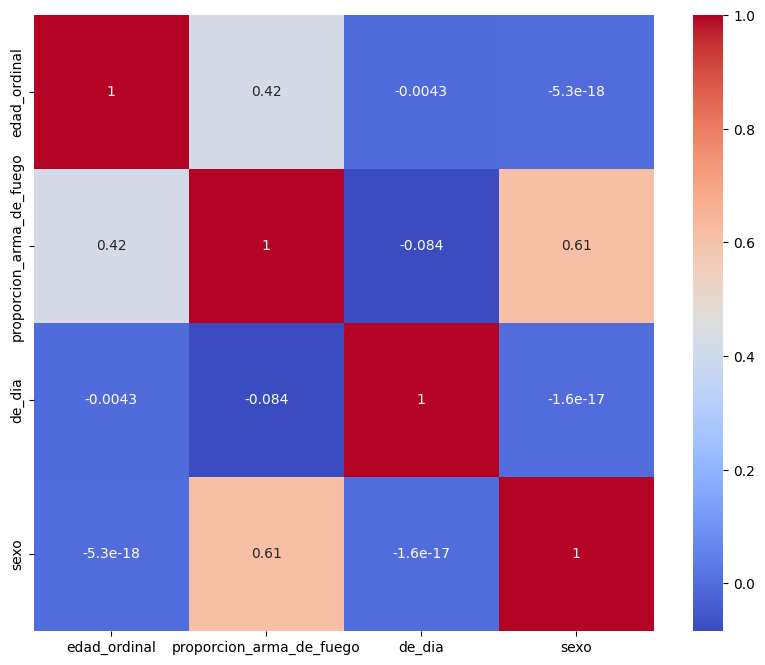

In [ ]:
corr_matrix = df_proporcion_Arma_Fuego.corr()

plt.figure(figsize=(10, 8))  # Especifica el tamaño de la figura

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

## Gráfico para toda la población según edad

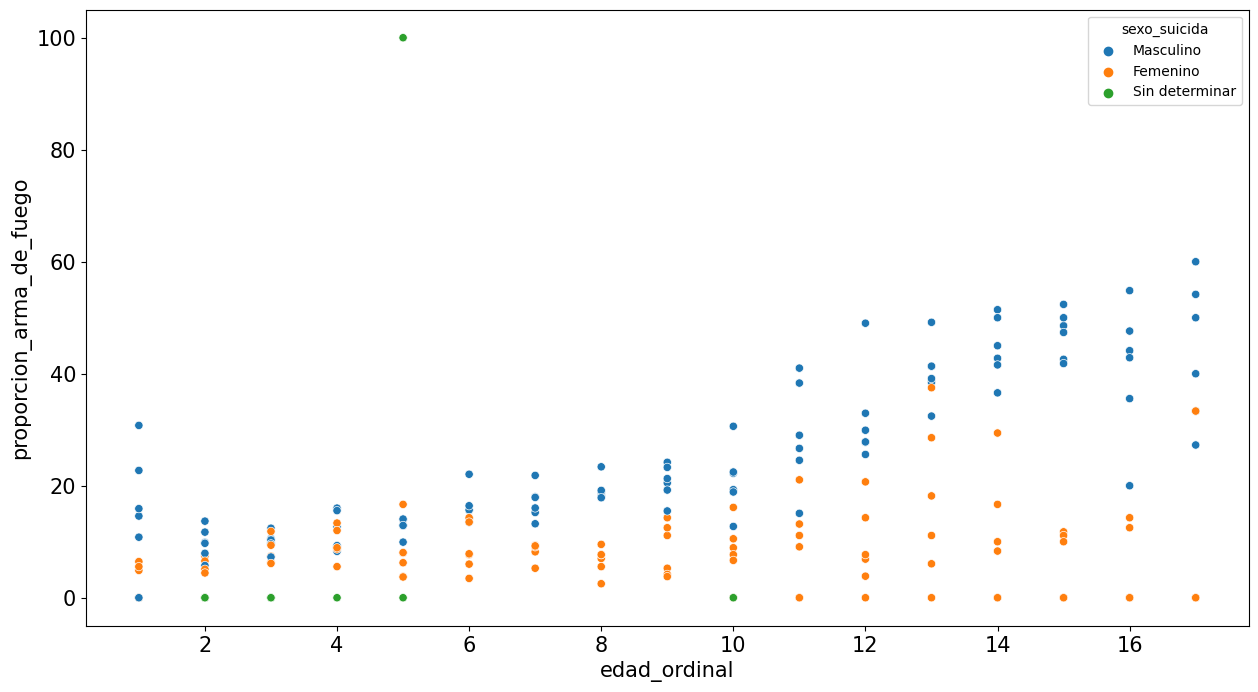

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data=df_proporcion_Arma_Fuego, hue='sexo_suicida')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Gráfico para hombres

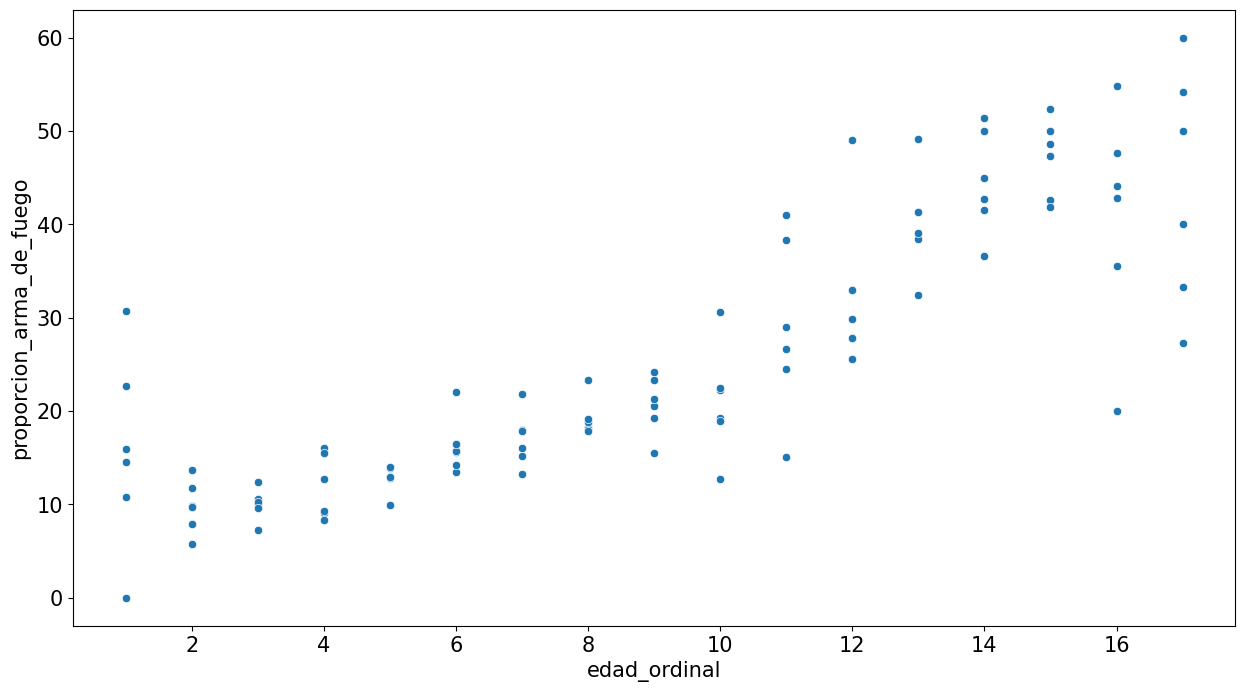

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data=df_proporcion_Arma_Fuego[df_proporcion_Arma_Fuego['sexo_suicida']=="Masculino"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Gráfico para mujeres

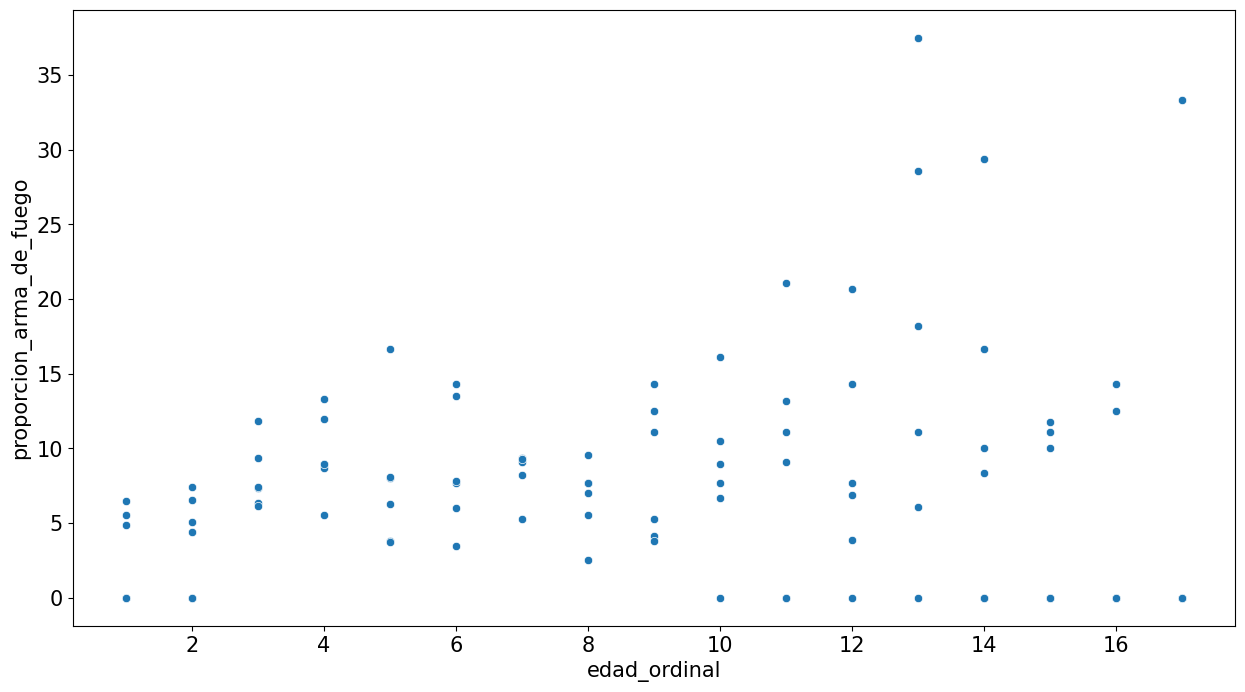

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data=df_proporcion_Arma_Fuego[df_proporcion_Arma_Fuego['sexo_suicida']=="Femenino"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Gráfico para toda la población según si el hecho ocurrió de día o no

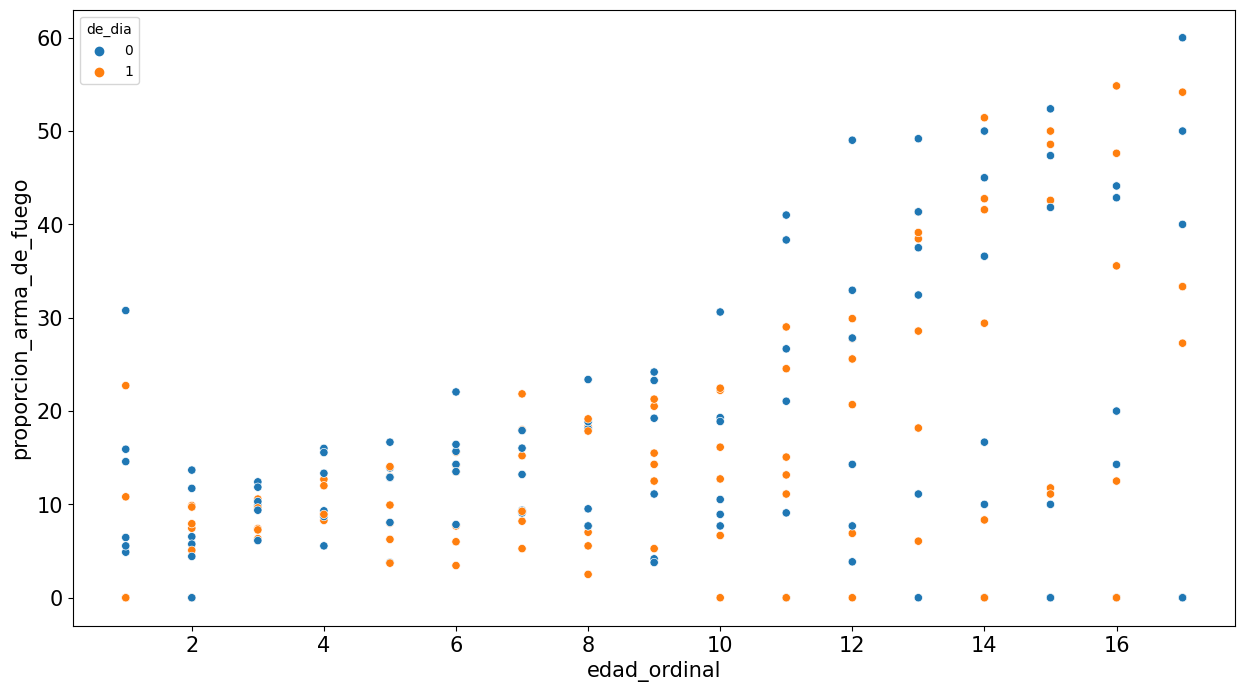

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data=df_proporcion_Arma_Fuego, hue='de_dia')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Gráfico para población de noche

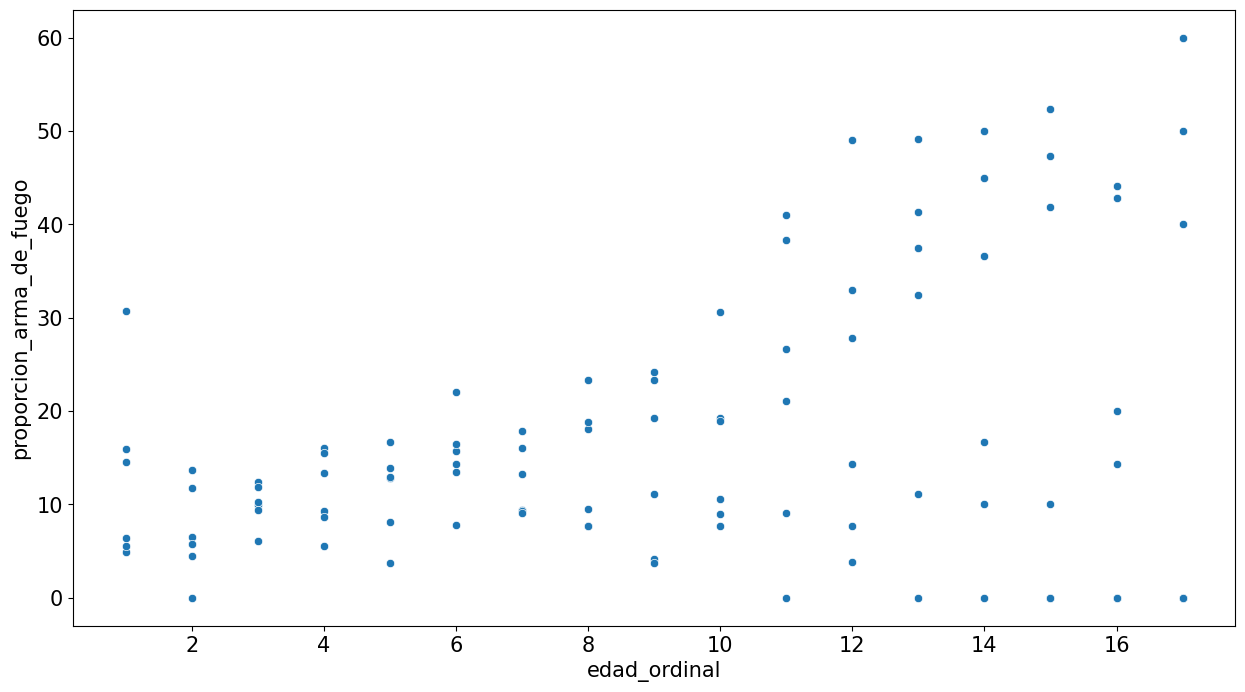

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data=df_proporcion_Arma_Fuego[df_proporcion_Arma_Fuego['de_dia']==0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Gráfico para población de día

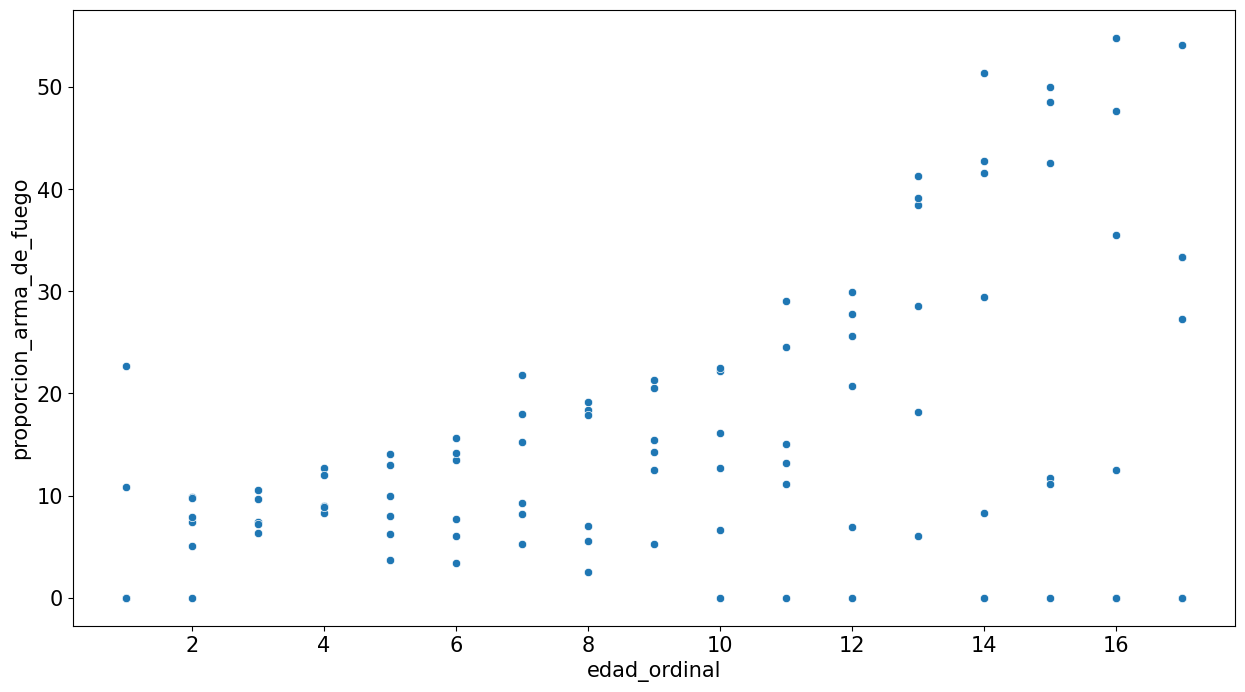

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data=df_proporcion_Arma_Fuego[df_proporcion_Arma_Fuego['de_dia']==1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Ahora probaremos con la otra modalidad más frecuente, "ahoracamiento"

In [ ]:
# Crear una lista para almacenar los datos
datos_proporcion = []

# Obtener todas las combinaciones posibles de edad_ordinal y hora_categorica
combinaciones = mlr_df_suicidio[['edad_ordinal', 'hora_categorica', "sexo_suicida"]].drop_duplicates()

# Calcular la proporción para cada combinación
for index, row in combinaciones.iterrows():
    edad = row['edad_ordinal']
    hora = row['hora_categorica']
    sexo = row["sexo_suicida"]

    # Filtrar las filas que cumplen la condición (edad_ordinal = 1 y hora_categorica = primera_mañana)
    condicion = (mlr_df_suicidio['edad_ordinal'] == edad) & (mlr_df_suicidio['hora_categorica'] == hora) & (mlr_df_suicidio['sexo_suicida'] == sexo)
    df_condiciones = mlr_df_suicidio.loc[condicion]

    # Filtrar las filas que cumplen la condición (edad_ordinal = 1 y hora_categorica = primera_mañana, modalidad = arma_de_fuego)
    condicion_ahorcamiento = condicion & (mlr_df_suicidio['modalidad'] == 'Ahorcamiento')
    df_condiciones_ahorcamiento = mlr_df_suicidio.loc[condicion_ahorcamiento]

    # Calcular la proporción
    proporcion = (len(df_condiciones_ahorcamiento) / len(df_condiciones))*100

    # Agregar los datos a la lista
    datos_proporcion.append([edad, hora, sexo, proporcion])

# Crear el nuevo DataFrame con los datos de proporción
df_proporcion_ahorcamiento = pd.DataFrame(datos_proporcion, columns=['edad_ordinal', 'hora_categorica', "sexo_suicida", 'proporcion_ahorcamiento'])

In [ ]:
# Definir el diccionario de mapeo de las horas a sus respectivos valores ordinales
hora_ordinal_mapping = {
    'Mañana': 1,
    'Media_Mañana': 1,
    'Tarde': 1,
    'Media_Tarde': 0,
    'Noche': 0,
    'Madrugada': 0
}

sexo_mapping = {
    'Masculino': 1,
    'Femenino': 0,
}

# Agregar la nueva columna "hora_ordinal" usando el mapeo
df_proporcion_ahorcamiento['de_dia'] = df_proporcion_ahorcamiento['hora_categorica'].map(hora_ordinal_mapping)
df_proporcion_ahorcamiento['sexo'] = df_proporcion_ahorcamiento['sexo_suicida'].map(sexo_mapping)

## Se buscan correlaciones entre las variables a partir de una matríz de correlación.
## Pueden notarse valores negativos considerables de "proporción de ahorcamiento" principalmente con Edad

<ipython-input-80-afdb5e1a1c8e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_proporcion_ahorcamiento.corr()


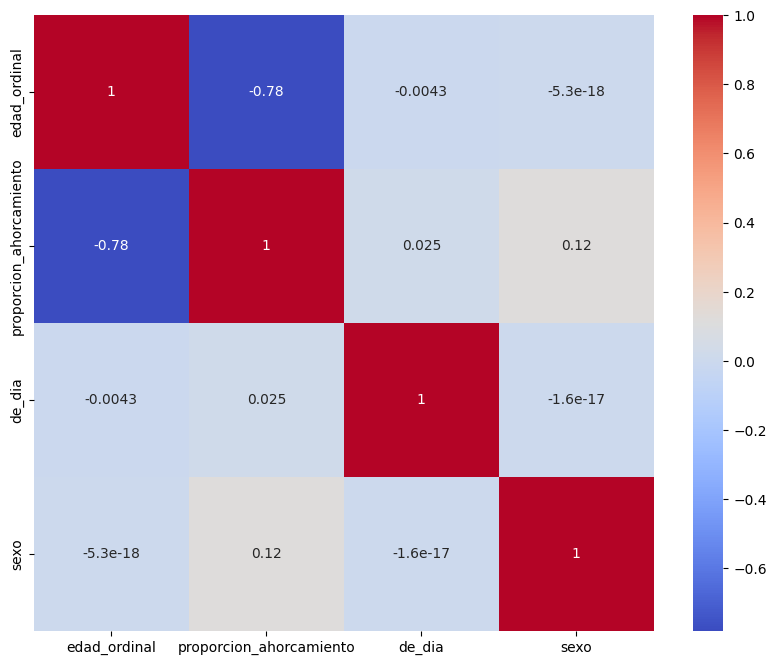

In [ ]:
corr_matrix = df_proporcion_ahorcamiento.corr()

plt.figure(figsize=(10, 8))  # Especifica el tamaño de la figura

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

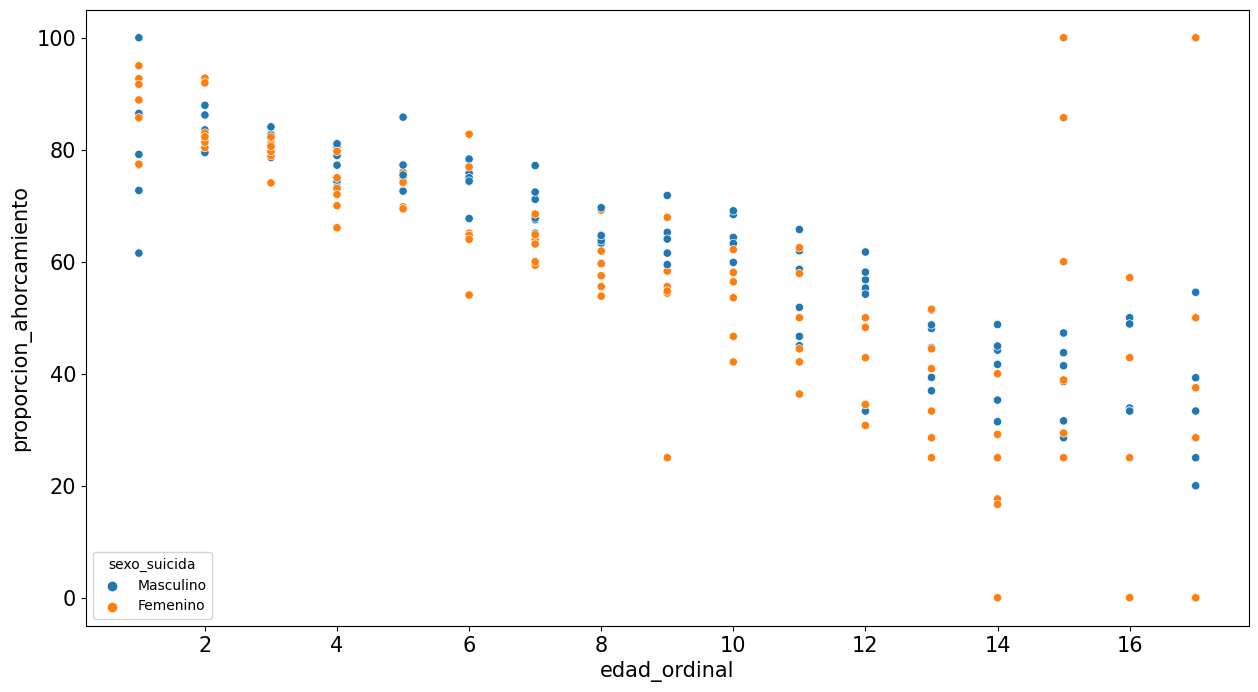

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data=df_proporcion_ahorcamiento, hue='sexo_suicida')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

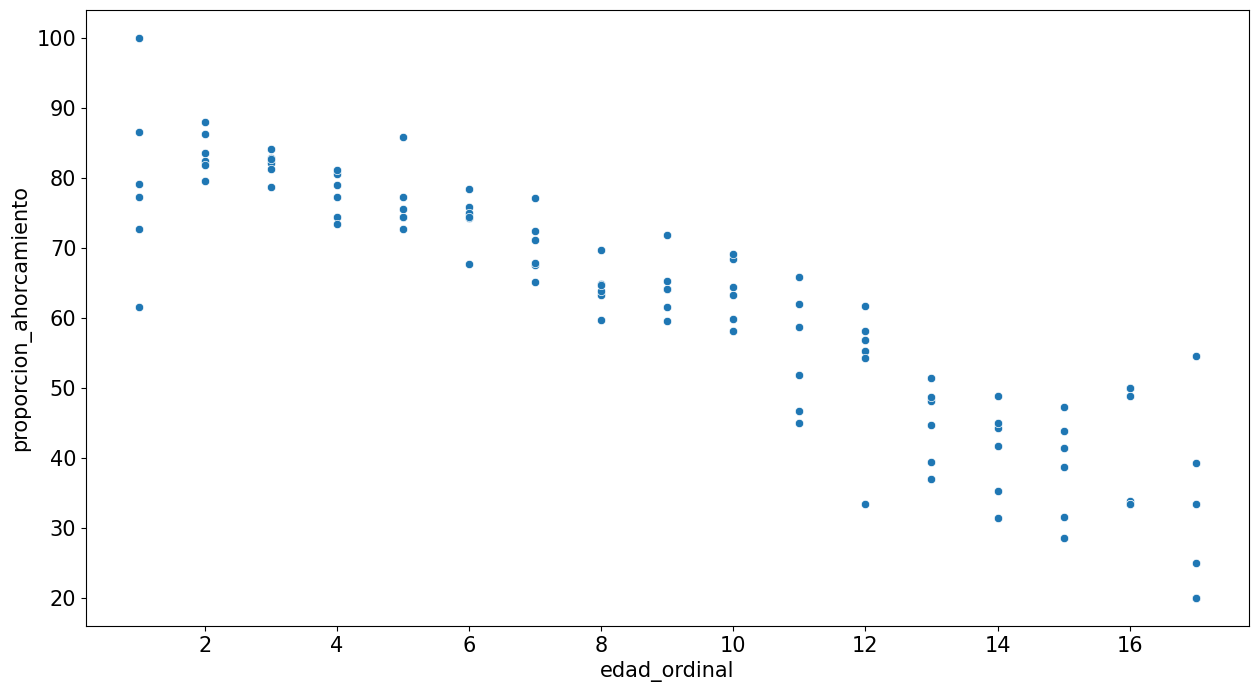

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data=df_proporcion_ahorcamiento[df_proporcion_ahorcamiento['sexo_suicida']=="Masculino"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

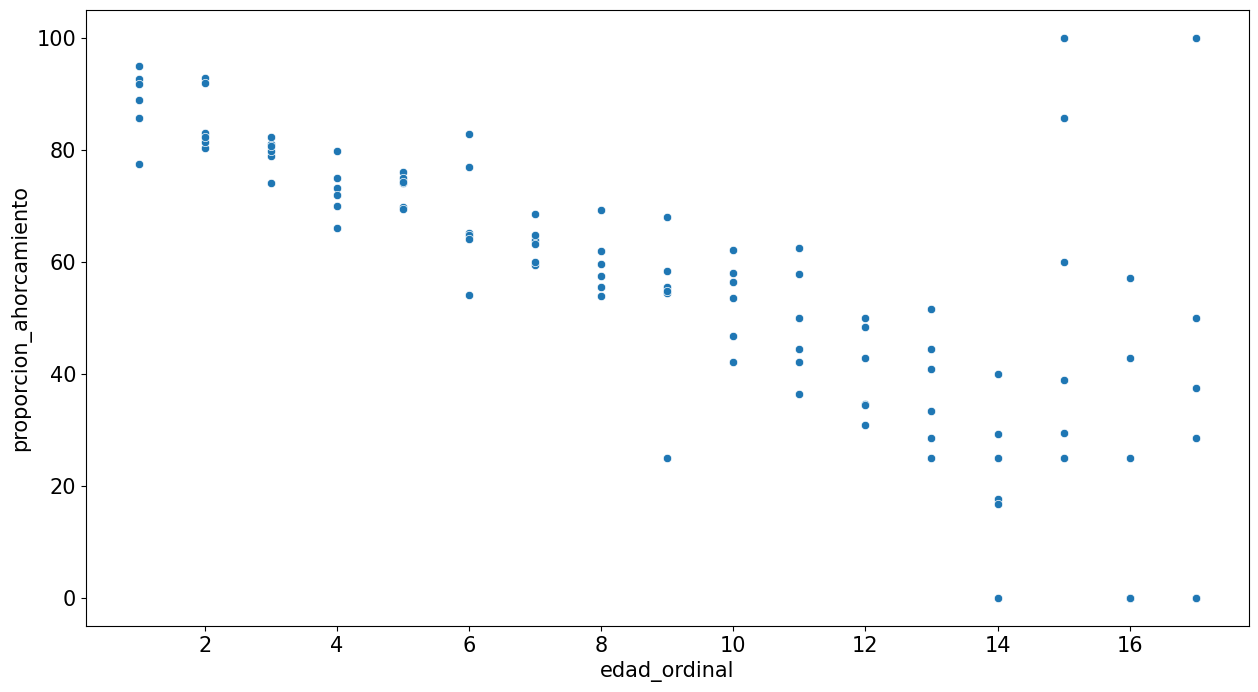

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data=df_proporcion_ahorcamiento[df_proporcion_ahorcamiento['sexo_suicida']=="Femenino"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

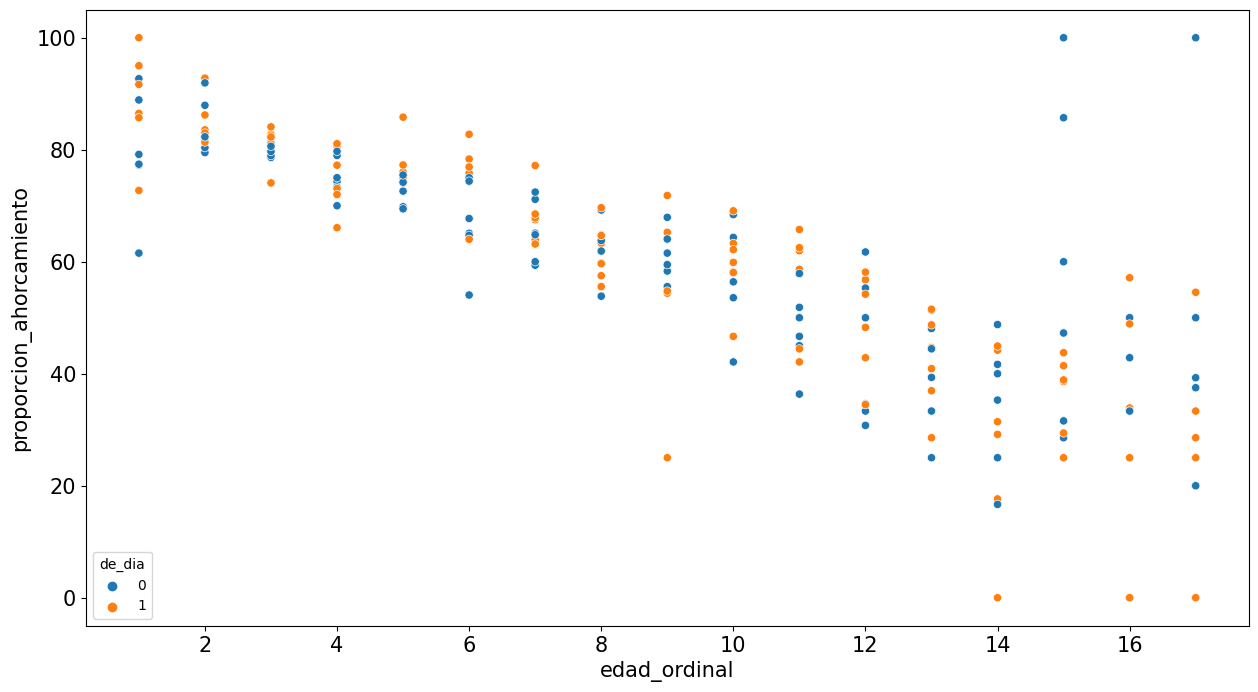

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data=df_proporcion_ahorcamiento, hue='de_dia')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

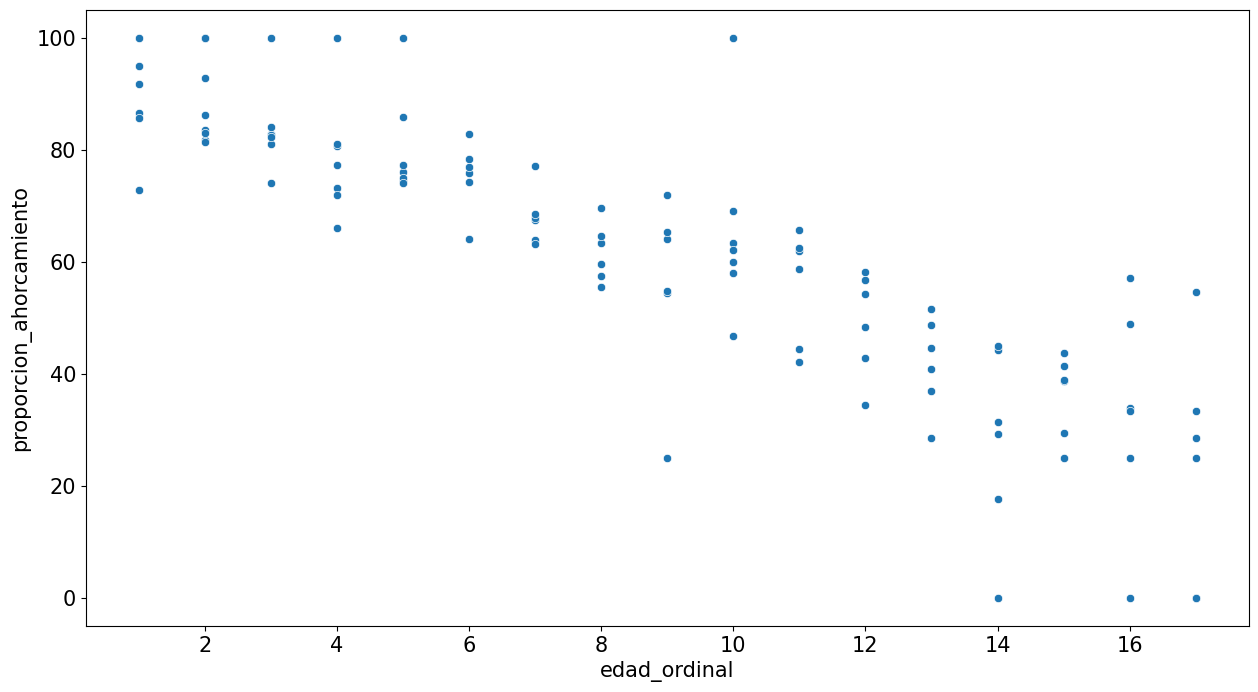

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data=df_proporcion_ahorcamiento[df_proporcion_ahorcamiento['de_dia']==1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

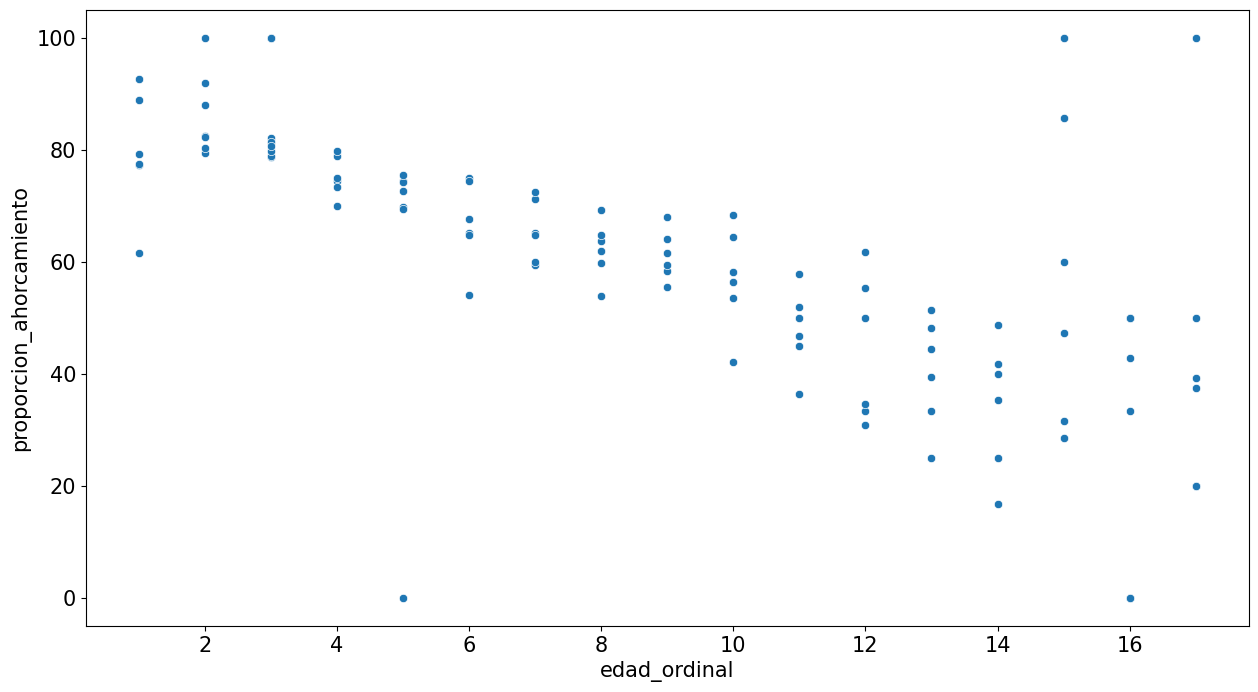

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data=df_proporcion_ahorcamiento[df_proporcion_ahorcamiento['de_dia']==0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

## Procedemos a notar los estadísticos que refieren a la posible correlación de variables a fin de lograr una recta de regresión lineal válida con el método de mínimos cuadrados.
## Según R squared la variabilidad de la variable dependiente explicada por la variabilidad de las variables independendientes de del 72% aproximadamente.
## El valor de t distinto de 0 y p < 0.10 indican que se podría sugerir descartar la hipotesis nula y considerar a la correlación como significativa.



In [ ]:
masculinos = df_proporcion_Arma_Fuego[df_proporcion_Arma_Fuego['sexo_suicida']=='Masculino'].copy()
mod_masculinos = smf.ols(formula='proporcion_arma_de_fuego ~ edad_ordinal', data=masculinos)
res_masculinos = mod_masculinos.fit()
print(res_masculinos.summary())

                               OLS Regression Results                               
Dep. Variable:     proporcion_arma_de_fuego   R-squared:                       0.724
Model:                                  OLS   Adj. R-squared:                  0.721
Method:                       Least Squares   F-statistic:                     262.4
Date:                      Fri, 07 Jul 2023   Prob (F-statistic):           1.02e-29
Time:                              21:39:34   Log-Likelihood:                -350.49
No. Observations:                       102   AIC:                             705.0
Df Residuals:                           100   BIC:                             710.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

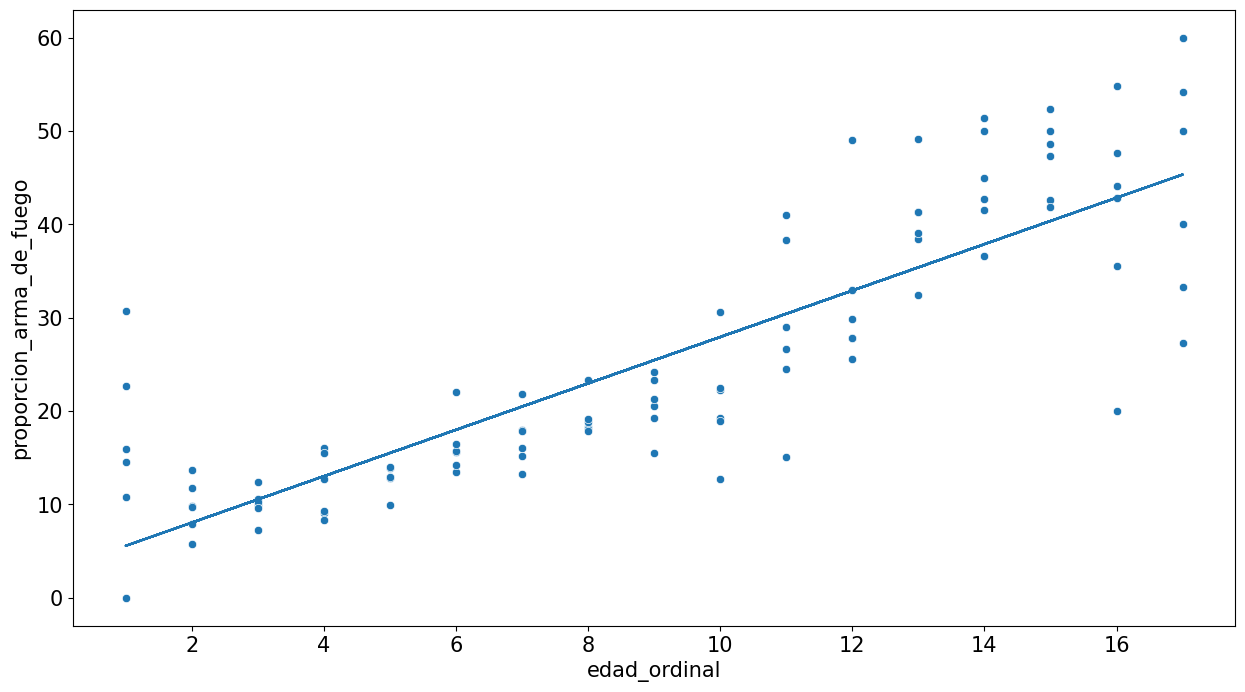

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data = masculinos)
plt.plot(masculinos['edad_ordinal'], res_masculinos.predict(masculinos['edad_ordinal']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Análogo propuesto para mujeres

In [ ]:
femeninos = df_proporcion_Arma_Fuego[df_proporcion_Arma_Fuego['sexo_suicida']=='Femenino'].copy()
mod_femeninos = smf.ols(formula='proporcion_arma_de_fuego ~ edad_ordinal', data=femeninos)
res_femeninos = mod_femeninos.fit()
print(res_femeninos.summary())

                               OLS Regression Results                               
Dep. Variable:     proporcion_arma_de_fuego   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                 -0.001
Method:                       Least Squares   F-statistic:                    0.8910
Date:                      Sun, 02 Jul 2023   Prob (F-statistic):              0.347
Time:                              05:35:54   Log-Likelihood:                -344.83
No. Observations:                       102   AIC:                             693.7
Df Residuals:                           100   BIC:                             698.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

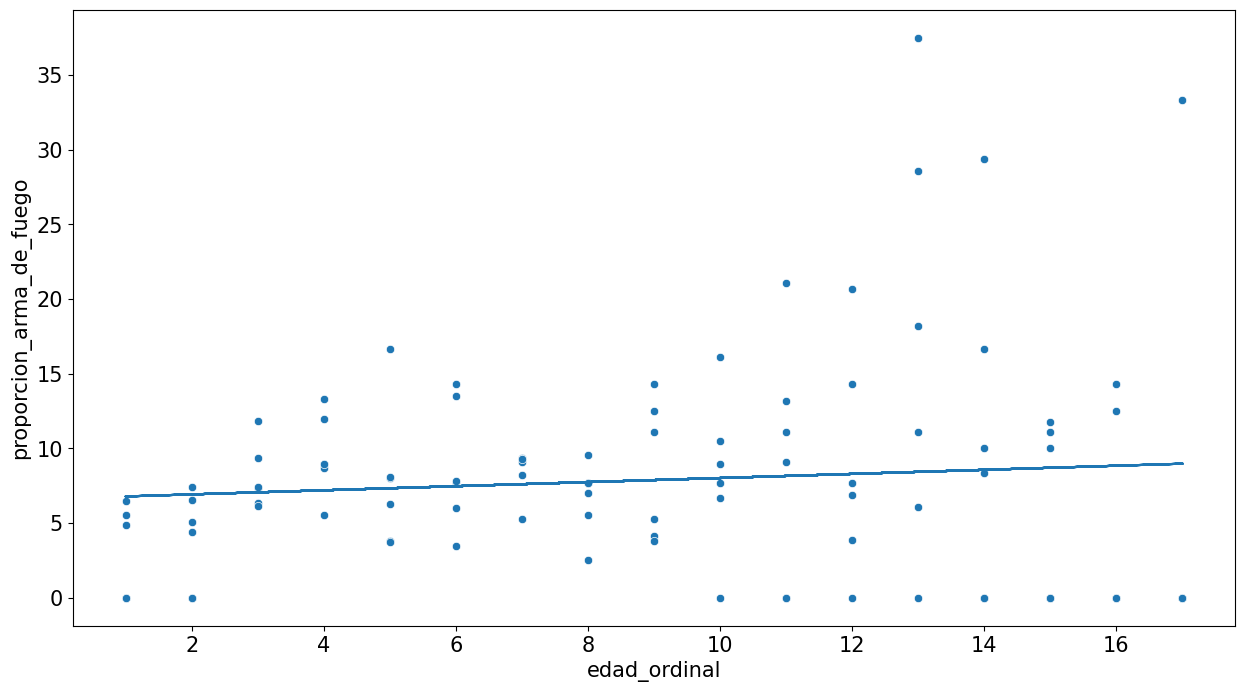

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego', data = femeninos)
plt.plot(femeninos['edad_ordinal'], res_femeninos.predict(femeninos['edad_ordinal']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Análogo propuesto para el total de la población

In [ ]:
mod = smf.ols(formula='proporcion_arma_de_fuego ~ edad_ordinal', data=df_proporcion_Arma_Fuego)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                               
Dep. Variable:     proporcion_arma_de_fuego   R-squared:                       0.201
Model:                                  OLS   Adj. R-squared:                  0.197
Method:                       Least Squares   F-statistic:                     50.90
Date:                      Sun, 02 Jul 2023   Prob (F-statistic):           1.71e-11
Time:                              05:37:54   Log-Likelihood:                -809.55
No. Observations:                       204   AIC:                             1623.
Df Residuals:                           202   BIC:                             1630.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

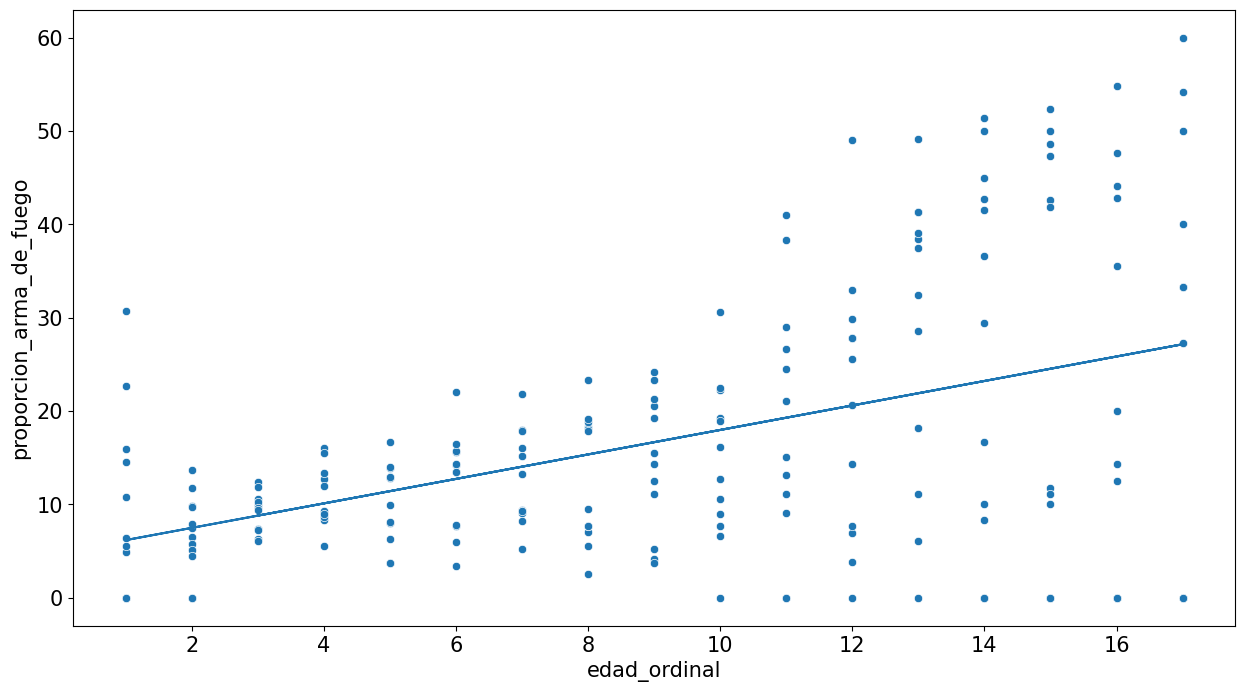

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego',data = df_proporcion_Arma_Fuego)
plt.plot(df_proporcion_Arma_Fuego['edad_ordinal'], res.predict(df_proporcion_Arma_Fuego['edad_ordinal']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Se evidencia mayor pendiente de la curva para la población masculina (azul) en comparación con total (verde) y mujeres (naranja)

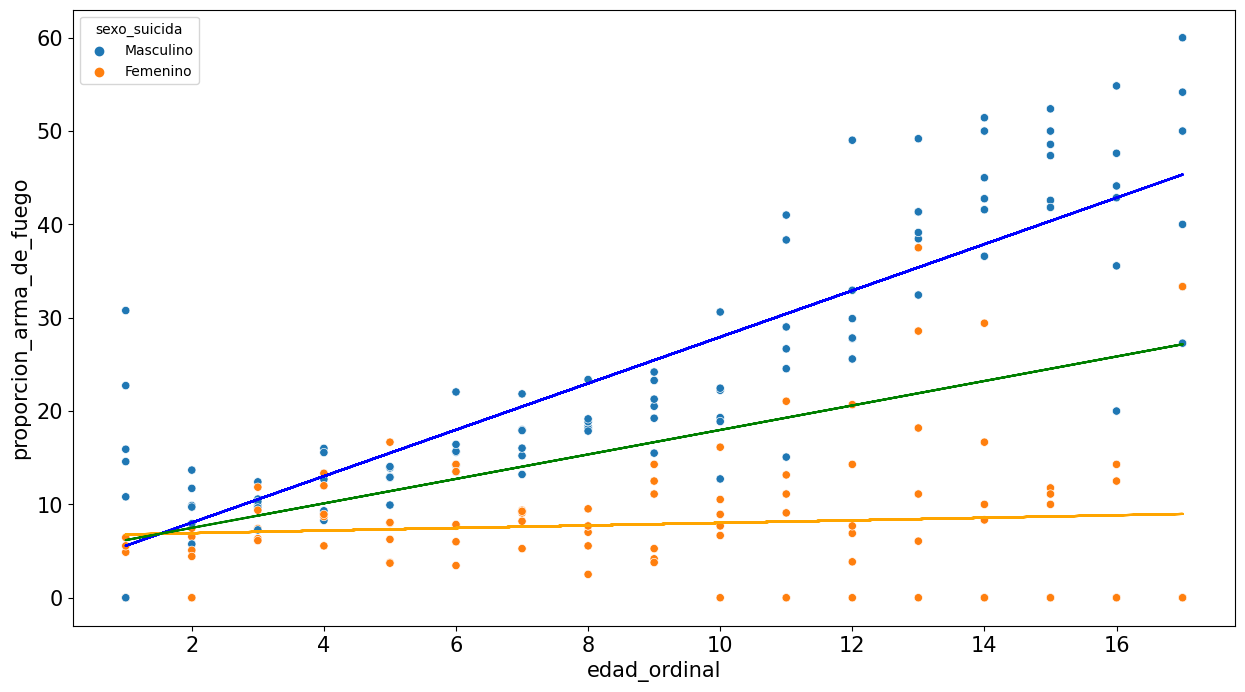

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='edad_ordinal',y='proporcion_arma_de_fuego',data =df_proporcion_Arma_Fuego, hue = 'sexo_suicida')
plt.plot(masculinos['edad_ordinal'], res_masculinos.predict(masculinos['edad_ordinal']), color = 'blue')
plt.plot(femeninos['edad_ordinal'], res_femeninos.predict(femeninos['edad_ordinal']), color = 'orange')
plt.plot(df_proporcion_Arma_Fuego['edad_ordinal'], res.predict(df_proporcion_Arma_Fuego['edad_ordinal']), color = 'green')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_arma_de_fuego',fontsize = 15);

## Se pretende reiterar el ejercicio con la modalidad "ahorcamiento", primero para hombres

In [ ]:
masculinosA = df_proporcion_ahorcamiento[df_proporcion_ahorcamiento['sexo_suicida']=='Masculino'].copy()
mod_masculinosA = smf.ols(formula='proporcion_ahorcamiento ~ edad_ordinal', data=masculinosA)
res_masculinosA = mod_masculinosA.fit()
print(res_masculinosA.summary())

                               OLS Regression Results                              
Dep. Variable:     proporcion_ahorcamiento   R-squared:                       0.830
Model:                                 OLS   Adj. R-squared:                  0.829
Method:                      Least Squares   F-statistic:                     489.7
Date:                     Sun, 02 Jul 2023   Prob (F-statistic):           2.57e-40
Time:                             05:56:27   Log-Likelihood:                -346.96
No. Observations:                      102   AIC:                             697.9
Df Residuals:                          100   BIC:                             703.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

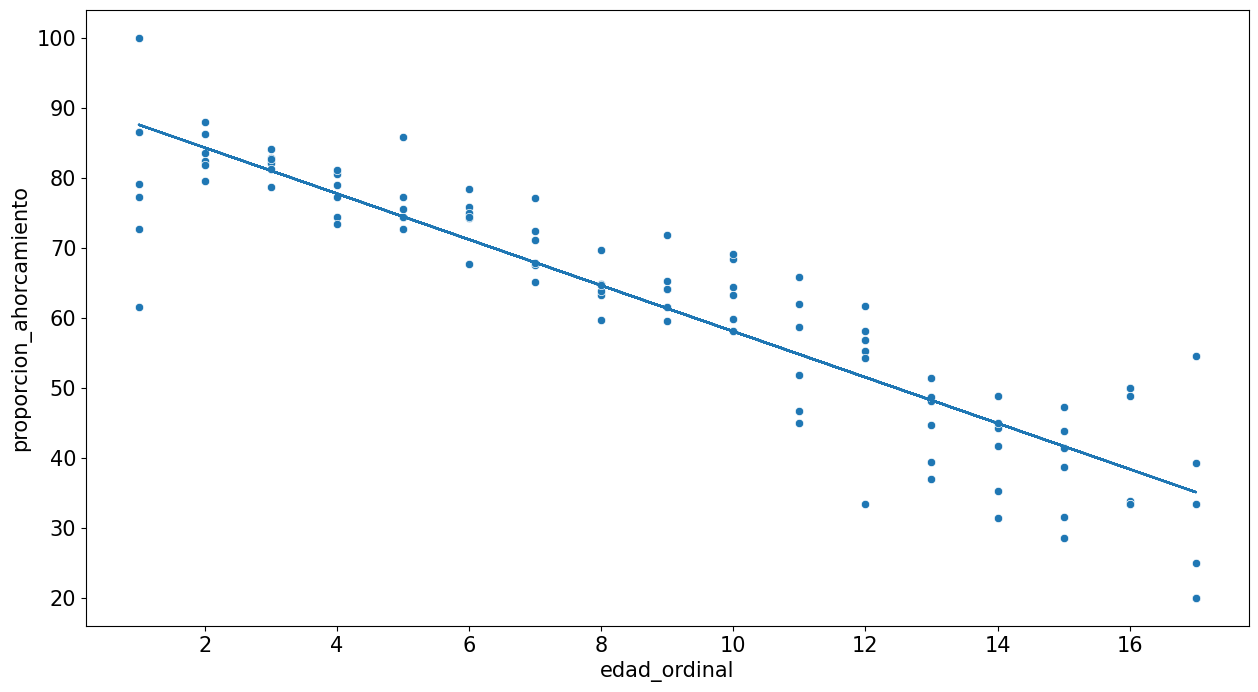

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data = masculinosA)
plt.plot(masculinosA['edad_ordinal'], res_masculinosA.predict(masculinosA['edad_ordinal']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

## Análogo para mujeres

In [ ]:
femeninosA = df_proporcion_ahorcamiento[df_proporcion_ahorcamiento['sexo_suicida']=='Femenino'].copy()
mod_femeninosA = smf.ols(formula='proporcion_ahorcamiento ~ edad_ordinal', data=femeninosA)
res_femeninosA = mod_femeninosA.fit()
print(res_femeninosA.summary())

                               OLS Regression Results                              
Dep. Variable:     proporcion_ahorcamiento   R-squared:                       0.570
Model:                                 OLS   Adj. R-squared:                  0.566
Method:                      Least Squares   F-statistic:                     132.5
Date:                     Sun, 02 Jul 2023   Prob (F-statistic):           5.00e-20
Time:                             05:56:36   Log-Likelihood:                -427.08
No. Observations:                      102   AIC:                             858.2
Df Residuals:                          100   BIC:                             863.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

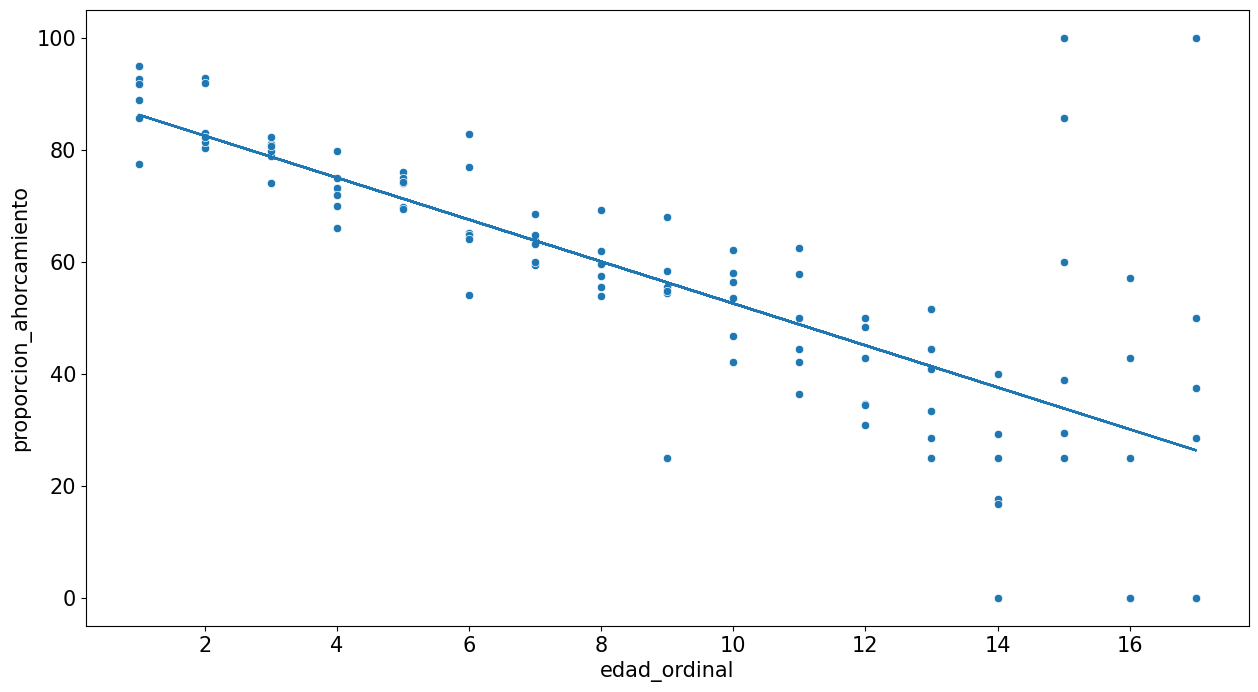

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='edad_ordinal',y='proporcion_ahorcamiento', data = femeninosA)
plt.plot(femeninosA['edad_ordinal'], res_femeninosA.predict(femeninosA['edad_ordinal']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('edad_ordinal',fontsize = 15)
plt.ylabel('proporcion_ahorcamiento',fontsize = 15);

In [ ]:
mod = smf.ols(formula='proporcion_arma_de_fuego ~ edad_ordinal + de_dia + sexo', data=df_proporcion_Arma_Fuego)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                               
Dep. Variable:     proporcion_arma_de_fuego   R-squared:                       0.580
Model:                                  OLS   Adj. R-squared:                  0.574
Method:                       Least Squares   F-statistic:                     92.08
Date:                      Sun, 02 Jul 2023   Prob (F-statistic):           1.81e-37
Time:                              06:14:25   Log-Likelihood:                -743.97
No. Observations:                       204   AIC:                             1496.
Df Residuals:                           200   BIC:                             1509.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

# Conclusiones:
## El sexo no influye particularmente en la modalidad ahorcamiento pero si lo hace en la modalidad arma de fuego. Los masculinos utilizan significativamente más esa modalidad a medida que envejecen.
## La edad es un factor que afecta fuertemente ambas modalidades. Mientras que un aumento en la edad correlaciona fuertemente con un aumento de probalidades de uso de arma de fuego (mucho mas en hombres que en mujeres), el ahorcamiento hace lo contrario, mientras mas avanzada la edad, menos probabilidades de implementar esa modalidad, especialmente en hombres.